In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma import cos
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import datetime


DNA_SIZE = 24
POP_SIZE = 100
CROSS_RATE = 0.5
MUTA_RATE = 0.15
Iterations = 50
X_BOUND = [0, 10]
Y_BOUND = [0, 10]


def F(x, y):  # 函数
    return (6.452 * (x + 0.125 * y) * (cos(x) - cos(2 * y)) ** 2) / (
                0.8 + (x - 4.2) ** 2 + 2 * (y - 7) ** 2) + 3.226 * y


def getfitness(pop):  # 适应度函数
    x, y = decodeDNA(pop)
    temp = F(x, y)
    return (temp - np.min(temp)) + 0.0001


def decodeDNA(pop):  # 二进制转坐标，解码
    x_pop = pop[:, 1::2]
    y_pop = pop[:, ::2]
    # .dot()用于矩阵相乘
    x = x_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
    y = y_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (Y_BOUND[1] - Y_BOUND[0]) + Y_BOUND[0]
    return x, y


def select(pop, fitness):  # 选择
    temp = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=fitness / (fitness.sum()))
    return pop[temp]


# mutation函数以及crossmuta函数均为编码过程


def mutation(temp, MUTA_RATE):  # 变异
    if np.random.rand() < MUTA_RATE:
        mutate_point = np.random.randint(0, DNA_SIZE)
        temp[mutate_point] = temp[mutate_point] ^ 1  # ^为异或运算


def crossmuta(pop, CROSS_RATE):  # 交叉
    new_pop = []
    for i in pop:
        temp = i
        if np.random.rand() < CROSS_RATE:
            j = pop[np.random.randint(POP_SIZE)]
            cpoints1 = np.random.randint(0, DNA_SIZE * 2 - 1)
            cpoints2 = np.random.randint(cpoints1, DNA_SIZE * 2)
            temp[cpoints1:cpoints2] = j[cpoints1:cpoints2]
            mutation(temp, MUTA_RATE)
        new_pop.append(temp)
    return new_pop


def print_info(pop):  # 输出最优解等
    fitness = getfitness(pop)
    maxfitness = np.argmax(fitness)
    print("max_fitness", fitness[maxfitness])
    x, y = decodeDNA(pop)
    print("最优的基因型:", pop[maxfitness])
    print("(x,y):", (x[maxfitness], y[maxfitness]))
    print("F(x,y)_max=", F(x[maxfitness], y[maxfitness]))


def plot_3d(ax):  # 建模
    X = np.linspace(*X_BOUND, 100)
    Y = np.linspace(*Y_BOUND, 100)
    X, Y = np.meshgrid(X, Y)
    Z = F(X, Y)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
    ax.set_zlim(-20, 160)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.pause(0.5)
    plt.show()


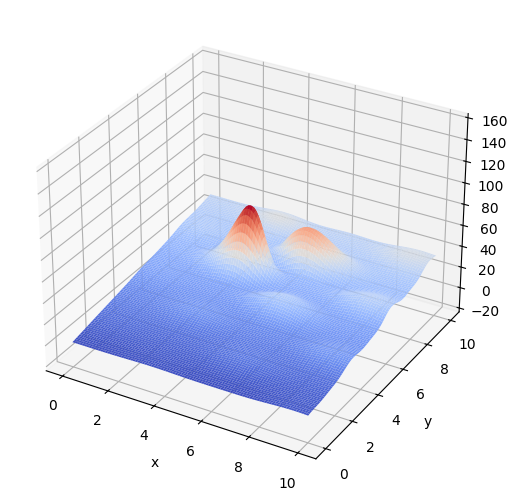

In [2]:
fig = plt.figure()
# ax = Axes3D(fig)
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
# 如果出现程序跑通但不显示图片问题请使用这两行代码，注释掉ax=Axes3D(fig)
plt.ion()
plot_3d(ax)
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE * 2))
start_t = datetime.datetime.now()

In [3]:
pop

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [54]:
np.random.randint(0, 100)

62